In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sdg_colors = ['#E5243B', '#DDA63A', '#4C9F38','#C5192D','#FF3A21','#26BDE2','#FCC30B','#A21942','#FD6925','#DD1367','#FD9D24','#BF8B2E','#3F7E44','#0A97D9','#56C02B','#00689D','#19486A']

In [2]:
#Preprocessing
#df = pd.read_csv('data/allSDGtweets.csv', encoding='latin1')
#df = df.drop(['Unnamed: 0', 'id','created_at','category'], axis=1)

In [3]:
data = pd.read_csv('data/formatedData.csv')
data.head()

,text,lang,#sdg1,#sdg2,#sdg3,#sdg4,#sdg5,#sdg6,#sdg7,#sdg8,#sdg9,#sdg10,#sdg11,#sdg12,#sdg13,#sdg14,#sdg15,#sdg16,#sdg17,nclasses
0,"With 300 million people without #EnergyAccess,...",en,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1
1,Happy new year 2019 to #Brussels #SDG11,en,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1
2,Nearly 4 000 new followers joined us on social...,en,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
3,In 2019 Promoting @Najim_Ali five simple #Pas...,en,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1
4,Please download the #Safecity Mobile app on An...,en,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1


## Number of tweets

In [4]:
print(f"Number of english tweets:\t\t {len(data[data['lang']=='en'])} \t({np.round(len(data[data['lang']=='en'])/len(data)*100,2)}%)")
print(f"Number of nclasses =1 tweets:\t {len(data[data['nclasses']==1])} \t({np.round(len(data[data['nclasses']==1])/len(data)*100,2)}%)")

Number of english tweets:		 784441 	(83.88%)
Number of nclasses =1 tweets:	 549975 	(58.81%)


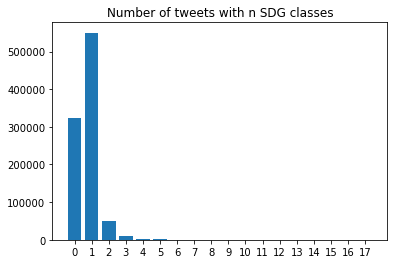

In [5]:
plt.bar(range(18), [np.sum(data['nclasses']==i) for i in range(18)])
plt.title("Number of tweets with n SDG classes")
plt.xticks(range(18),range(18))
plt.show()

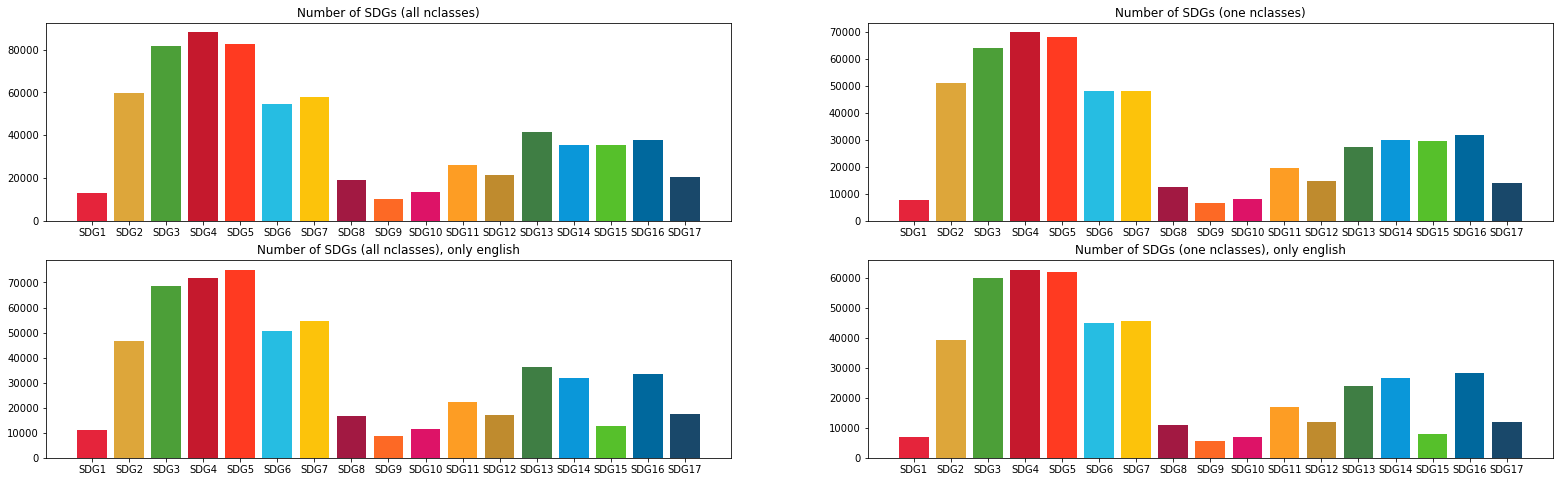

In [6]:
plt.figure(figsize=(27, 8))
plt.subplot(2,2,1)
plt.bar(range(1,18),[np.sum(data[f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (all nclasses)")
plt.subplot(2,2,2)
plt.bar(range(1,18),[np.sum(data[data['nclasses']==1][f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (one nclasses)")
plt.subplot(2,2,3)
plt.bar(range(1,18),[np.sum(data[data['lang']=='en'][f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (all nclasses), only english")
plt.subplot(2,2,4)
plt.bar(range(1,18),[np.sum(data[np.logical_and(data['nclasses']==1,data['lang']=='en')][f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (one nclasses), only english")
plt.show()

## Tweet lenght

In [21]:
text_length = np.zeros(17)
word_text_length = np.zeros(17)

for i in range(1,18):
    for text in data[data[f'#sdg{i}']==True]['text']:
        text_length[i-1] += len(text)
        word_text_length[i-1] += len(text.split())

text_length = text_length/([np.sum(data[f'#sdg{i}']) for i in range(1,18)])
word_text_length = word_text_length/([np.sum(data[f'#sdg{i}']) for i in range(1,18)])

for i in range(17):
    print(f"Average text length for #SDG{i+1}: \t {np.round(text_length[i])} characters per tweet \t {np.round(word_text_length[i])} words per tweet")

Average text length for #SDG1: 	 226.0 characters per tweet 	 27.0 words per tweet
Average text length for #SDG2: 	 197.0 characters per tweet 	 21.0 words per tweet
Average text length for #SDG3: 	 248.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG4: 	 246.0 characters per tweet 	 27.0 words per tweet
Average text length for #SDG5: 	 230.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG6: 	 213.0 characters per tweet 	 26.0 words per tweet
Average text length for #SDG7: 	 241.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG8: 	 247.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG9: 	 243.0 characters per tweet 	 27.0 words per tweet
Average text length for #SDG10: 	 236.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG11: 	 244.0 characters per tweet 	 27.0 words per tweet
Average text length for #SDG12: 	 239.0 characters per tweet 	 28.0 words per tweet
A

## Vocabulary